In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

10000

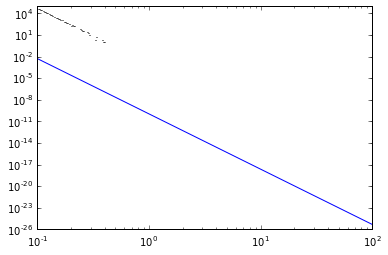

In [19]:
def powerLH(m_min, m_max, alpha, bins, specbins = False):
    value, error = integrate.quad(lambda m: m**(-alpha), m_min, m_max)
    c = 1./value
    if (specbins):
        M = np.logspace(np.log(m_min), np.log(m_max), bins)
    else:
        M = np.logspace(np.log(m_min), np.log(m_max), bins)
    P = c*M**(-alpha)
    return P

testM = np.logspace(-1, 2, 10000)
test = powerLH(.001, 10, 2.5, 10000)

randmasses = np.random.choice(testM, 10000000, p = test/sum(test))
plt.loglog(testM,test/sum(test))


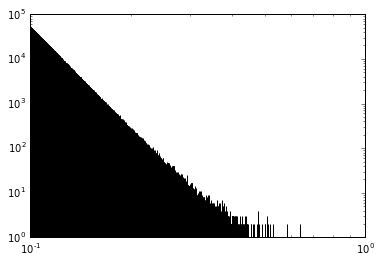

In [22]:
n, bins, patches = plt.hist(randmasses, bins = 10000)
plt.yscale('log')
plt.xscale('log')
error = np.sqrt(bins[:-1])

In [29]:
import emcee

def logL(theta, x, y, sigma):
    model = powerLH(theta[0], theta[1], theta[2], len(y))
    return -0.5*(np.sum((y/np.sum(y)-model/np.sum(model))**2/(sigma/np.sum(sigma))**(2.) + np.log(2*np.pi*(sigma/np.sum(sigma))**2)))

def lnprior(theta):
    if theta[0] > .000001 and theta[1] > 10000 and theta[2] < 100 and theta[2] > 0:
        return 0.
    else:
        return -np.inf

def lnprob(theta, x, y, sigma):
    return lnprior(theta) + logL(theta, x, y, sigma)

ndim, nwalkers = 5, 100
pos = [1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (bins, n, error))
sampler.run_mcmc(pos, 5000)


NaN value of lnprob for parameters: 
[ -4.24565297e-05  -9.47456324e-05  -6.34790392e-05  -1.03517052e-04
  -1.60407670e-04]
[ -3.66794897e-05   6.58385043e-05   8.13685855e-05   1.30502419e-04
   1.91086830e-05]
[ -4.55016922e-05  -1.30625595e-04   4.09302729e-05  -2.98651605e-05
   8.61461308e-05]
[ -1.16389523e-04  -8.62389052e-05   8.01525983e-05   5.93781480e-05
   3.25264140e-05]
[  4.41557415e-05  -1.21619644e-04   7.16620476e-05  -1.69555441e-05
   4.68236350e-05]
[  2.39069928e-05  -1.36419506e-04   1.61482099e-06   1.28300495e-04
  -4.69690069e-05]
[  4.81555384e-05  -4.24412599e-05   7.86696203e-05  -5.38961254e-05
  -1.06892834e-04]
[ -1.14042810e-04  -1.27956548e-04   1.12961124e-04   8.19585942e-05
  -1.45561152e-04]
[ -8.67253508e-06  -1.23512281e-04   7.41191391e-05  -6.31302604e-05
   1.68073232e-04]
[  5.10561850e-05  -6.28662121e-05   2.74403004e-05   3.97480493e-06
   8.12439840e-06]
[ -2.11829812e-05  -5.57838872e-05  -2.26598577e-06  -7.93694979e-05
   5.14544413e

/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


ValueError: lnprob returned NaN.

In [25]:
import pdb
pdb.run('sampler.run_mcmc(pos, 5000)')

> <string>(1)<module>()
(Pdb) step
--Call--
> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/sampler.py(135)run_mcmc()
-> def run_mcmc(self, pos0, N, rstate0=None, lnprob0=None, **kwargs):
(Pdb) 
> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/sampler.py(161)run_mcmc()
-> if pos0 is None:
(Pdb) next
> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/sampler.py(171)run_mcmc()
-> for results in self.sample(pos0, lnprob0, rstate0, iterations=N,
(Pdb) 
> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/sampler.py(172)run_mcmc()
-> **kwargs):
(Pdb) step
--Call--
> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py(130)sample()
-> def sample(self, p0, lnprob0=None, rstate0=None, blobs0=None,
(Pdb) 
> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py(188)sample()
-> self.random_state = rstate0
(Pdb) next
> /home/max/anaconda2/envs/moresnakes/l

/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


> /home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py(384)_get_lnprob()
-> try:
(Pdb) self.lnprobfn
(Pdb) p[]
[]
(Pdb) p[0]
[0]
(Pdb) p[10]
[10]
(Pdb) p
*** SyntaxError: unexpected EOF while parsing
(Pdb) print(p)
[[ -4.13021065e-05  -5.02097578e-05   1.51072451e-04  -2.37846645e-07]
 [  1.76847704e-04  -5.61315561e-05   6.38856561e-05   5.49376358e-05]
 [  6.23309971e-05  -1.73792889e-04  -1.50670800e-04  -3.87704852e-05]
 [  1.32800656e-04  -5.69783824e-05   1.04104206e-04   1.58339728e-04]
 [  1.06660688e-05  -2.27977084e-04  -1.19956719e-04  -2.28391576e-05]
 [ -1.43814638e-05  -4.27905592e-05   1.20038893e-04   4.99213333e-05]
 [ -1.00236603e-04  -3.61786227e-05  -4.60404555e-05  -6.76904964e-05]
 [ -1.20292693e-04   7.53553123e-05  -9.62820877e-05   3.38725198e-05]
 [ -4.14063089e-07   1.85301612e-04   6.60252702e-05   1.82604511e-04]
 [ -1.18260127e-04  -6.13491756e-05   1.18607219e-04  -3.20997373e-05]
 [ -3.95034934e-06   3.06519569e-05  -1.760782